In [1]:
from smt.design_space import (
    DesignSpace,
    FloatVariable,
    CategoricalVariable,
)
import seaborn as sns
from smt.kernels import PowExp, Constant
import pandas as pd
from smt_explainability.problems import MixedCantileverBeam
from smt_explainability.shap import ShapFeatureImportanceDisplay
from smt.surrogate_models import KRG
from smt.applications.mixed_integer import (
    MixedIntegerKrigingModel,
)
from smt_explainability.shap import ShapDisplay
import numpy as np
from smt.surrogate_models import MixIntKernelType
import matplotlib.pyplot as plt
from smt_explainability.pdp import PartialDependenceDisplay

%matplotlib inline 
# Importation des outils d'explainability
from smt_explainability.shap import ShapDisplay, ShapFeatureImportanceDisplay
from smt.design_space import DesignSpace, FloatVariable, IntegerVariable
import shap
import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models import KRG

# Définition du Design Space avec tes 5 variables

design_space_reduced = DesignSpace(
    [
        IntegerVariable(2, 5),  # Nombre de types
        FloatVariable(0.01, 1.0),  # Densité
        FloatVariable(0.0, 1.0),  # Intolérance
        IntegerVariable(10, 40),  # Taille de la grille
        IntegerVariable(1, 10),  # Vision
    ]
)

import time
import asyncio
from sklearn import tree
from gama_client.message_types import MessageTypes
from gama_client.sync_client import GamaSyncClient
from typing import Dict
import csv
import os
import os
import subprocess
import win32com.client
import signal
import time
import sys
import fileinput
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

from smt.surrogate_models import KRG, KPLS, LS, QP, RBF,IDW,RMTB,RMTC,GPX,GENN
from smt.applications.mixed_integer import (
    MixedIntegerSamplingMethod,
)
from smt.sampling_methods import LHS, Random, FullFactorial
from smt.surrogate_models import MixIntKernelType

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
#from smt.utils import compute_rms_error
import re
import json
import shutil
import unittest
from itertools import product
from smt.sampling_methods import LHS
from smt.surrogate_models import MixIntKernelType
from smt_design_space_ext import (
    AdsgDesignSpaceImpl,
    ConfigSpaceDesignSpaceImpl,
    DesignSpace,
    FloatVariable,
    IntegerVariable,
    OrdinalVariable,
    CategoricalVariable,
)
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

from smt.sampling_methods import LHS
from smt.applications.mfk import MFK, NestedLHS
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [2]:


import pathlib
current_file_path = str(pathlib.Path().resolve())


# Specify the directory containing the files
folder_path = current_file_path+'\doe_5_200'

DATABASEy = []
DATABASEx = []
# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    # Make sure it's a file and not a directory
    if os.path.isfile(file_path):
        # Open the file
        with open(file_path, 'r') as file:
            last_line = file.readlines()[-1]
            DATABASEx.append(np.array(file_path[35:-11].split('_'),dtype=np.float64))
            DATABASEy.append(np.array([bool(last_line.split(',')[0].lower() =="true"),float(last_line.split(',')[1])]))
DATABASEy = np.array(DATABASEy)
DATABASEx = np.array(DATABASEx)
    

# Extract values where first column is True
true_values = DATABASEy[DATABASEy[:, 0] == True][:, 1]
# Extract values where first column is False
false_values = DATABASEy[DATABASEy[:, 0] == False][:, 1]
ALL = np.concatenate((DATABASEx, DATABASEy), axis=1)



In [3]:

design_space_reduced = DesignSpace(
          [
              IntegerVariable(2, 5),# Marche entre 1 et 8
              FloatVariable(0.01, 1.0), #Density
              FloatVariable(0.0, 1.0), # intolerance
              IntegerVariable(10, 40), #size
              IntegerVariable(1, 10), #vision
              
          ]
      )
  

xdoes = NestedLHS(nlevel=3, design_space=design_space_reduced, random_state=0)
xt_200, xt_100, xt_50 = xdoes(50)  
# print(len(np.array([np.where(np.all(DATABASEx == xt_200[i], axis=1)) for i in range(200)]).flatten()))
matching_rows50 = np.array([np.where(np.all(DATABASEx == xt_50[i], axis=1)) for i in range(50)]).flatten()
matching_rows100 = np.array([np.where(np.all(DATABASEx == xt_100[i], axis=1)) for i in range(100)]).flatten()
# print(len(np.array([np.where(np.all(np.atleast_2d(matching_rows100) == matching_rows50[i], axis=0)) for i in range(250)]).flatten()))



xt = DATABASEx[matching_rows50[matching_rows50 %5 <5]][:,:]
yt =DATABASEy[matching_rows50[matching_rows50 %5 <5]][:,0]


# training the model
sm = KRG(use_het_noise=False,poly="linear",corr ="squar_exp",pow_exp_power=1.1, eval_noise=True,print_global=False)
sm.set_training_values(xt, yt)
sm.train()


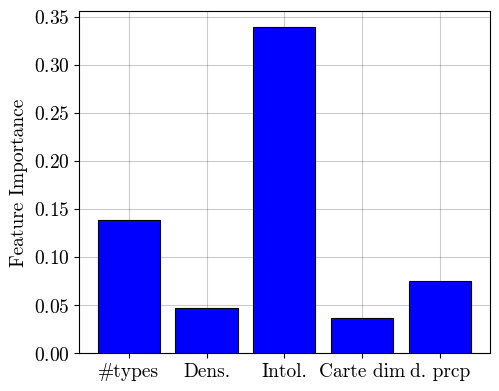

In [4]:
feature_names = ["#types", "Dens.", "Intol.", "Carte dim", "d. prcp"]

feature_names = feature_names
shap_importance = ShapFeatureImportanceDisplay.from_surrogate_model(
    sm,
    DATABASEx,
    feature_names=feature_names,
    categorical_feature_indices=None,
    method="kernel",
)
a = shap_importance.plot()

a.show()
plt.show()

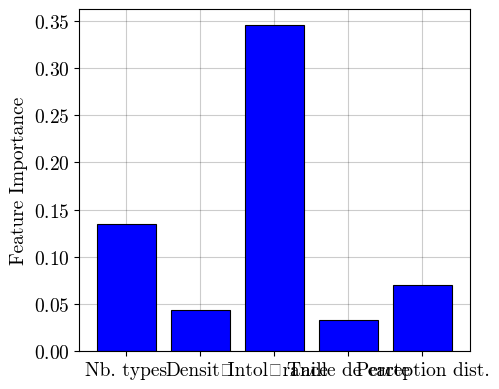

In [18]:
feature_names = ["#types", "Dens.", "Intol.", "Carte dim", "d. prcp"]
feature_names = np.array(["Nb. types", "Densité", " Intolérance", "Taille de carte", "Perception dist."])

feature_names = feature_names
shap_importance = ShapFeatureImportanceDisplay.from_surrogate_model(
    sm,
    DATABASEx,
    feature_names=feature_names,
    categorical_feature_indices=None,
    method="exact",
)
a = shap_importance.plot()

a.show()
plt.show()

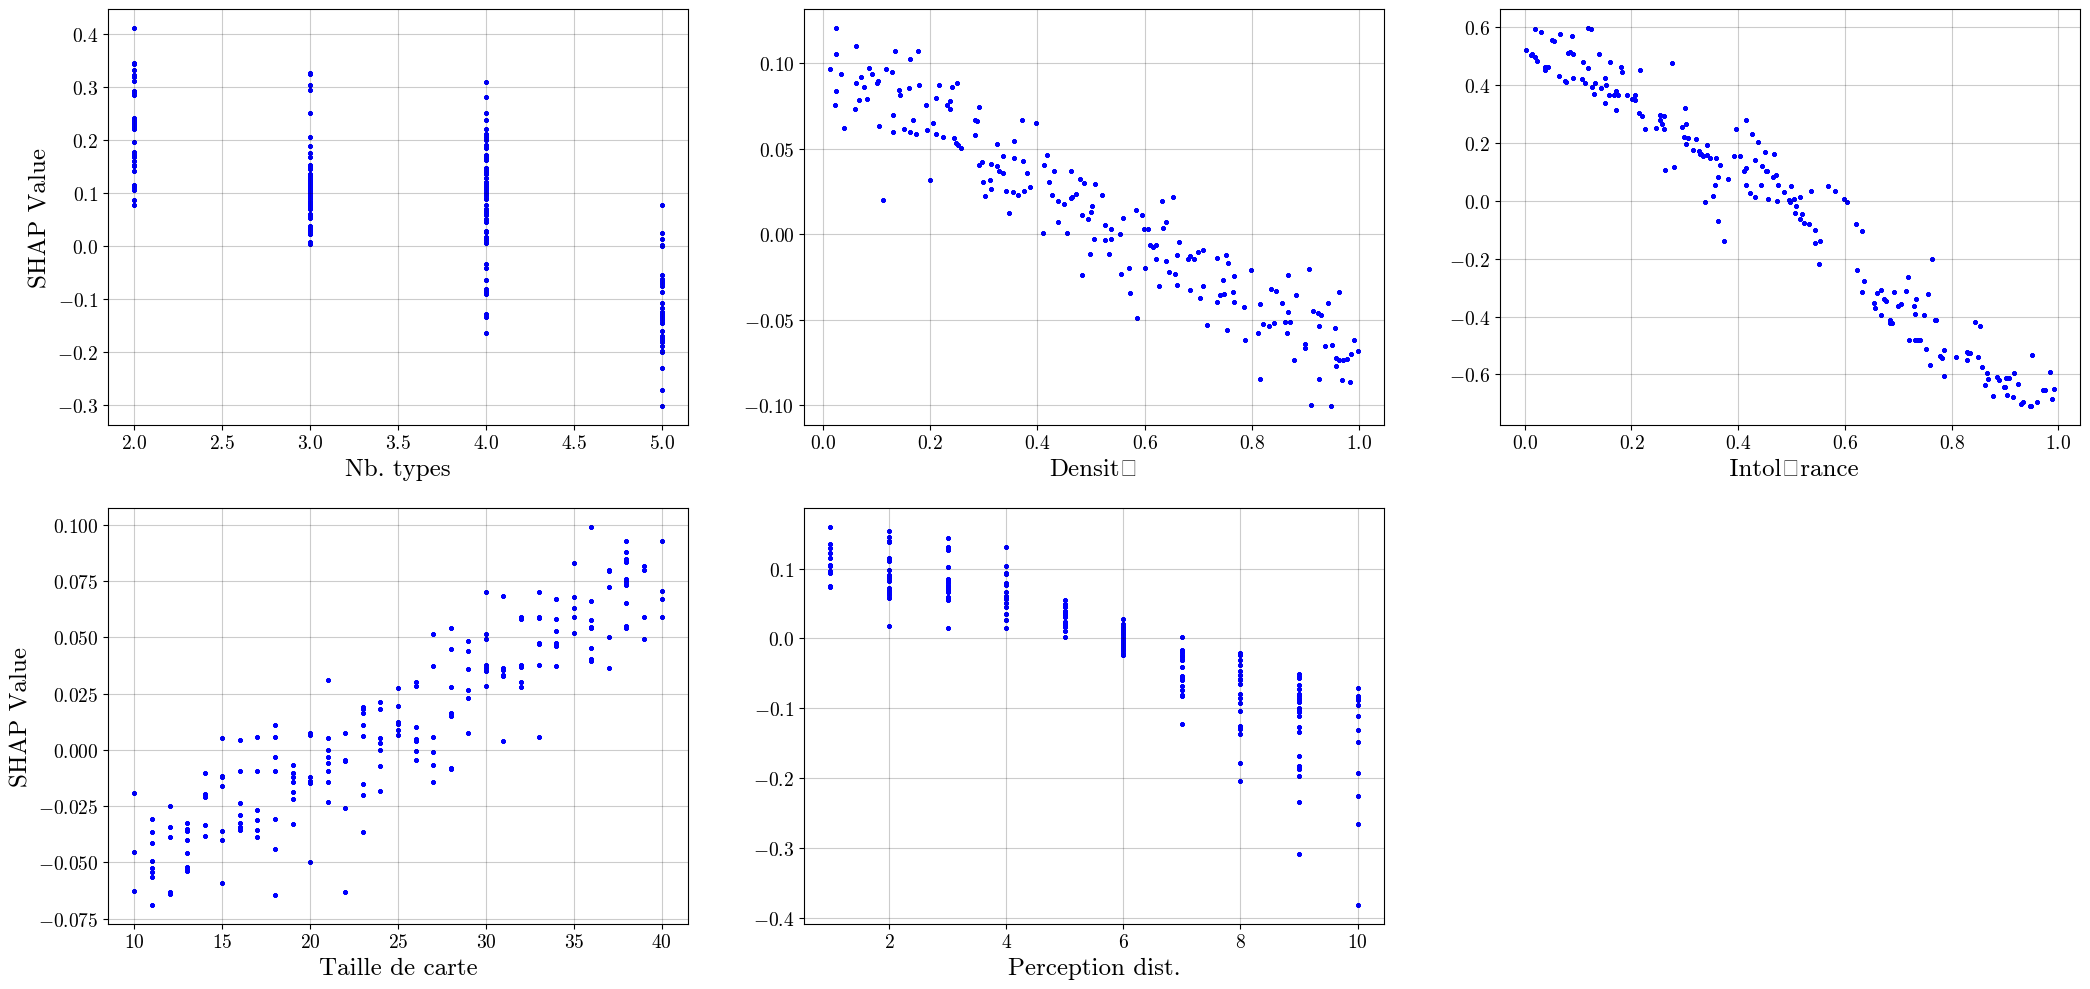

In [19]:
%matplotlib inline 

shap_explainer = ShapDisplay.from_surrogate_model(
    DATABASEx,
    sm,
    xt,
    feature_names=feature_names,
    method="kernel",
)

index_for_individual_plot = 0
feature_pairs_for_mixed_problem = [(0, 1), (2, 0), (1, 2)]


b = shap_explainer.dependence_plot([0, 1, 2,3, 4])
plt.savefig("conv_shap.png", dpi=350, bbox_inches='tight')
plt.tight_layout()
b.show()
plt.show()
# c = shap_explainer.summary_plot()
# c.show()

# d = shap_explainer.individual_plot(index=index_for_individual_plot)
# d.show()

# e = shap_explainer.interaction_plot(feature_pairs_for_mixed_problem)
# e.show()

# f = shap_explainer.individual_plot(index=index_for_individual_plot)
# f.show()

# g = shap_explainer.interaction_plot(feature_pairs_for_mixed_problem)
# g.show()
# h = shap_explainer.summary_plot()
# h.show()

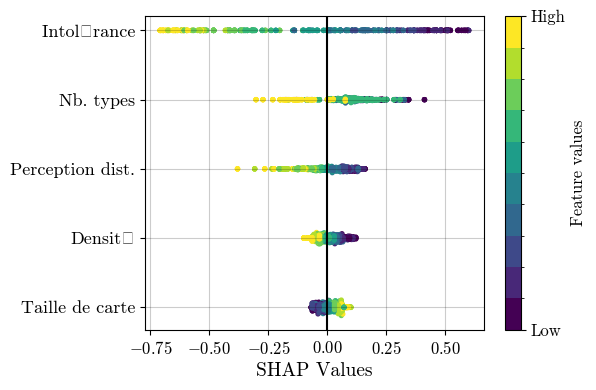

In [20]:
c = shap_explainer.summary_plot()
c.show()


plt.show()


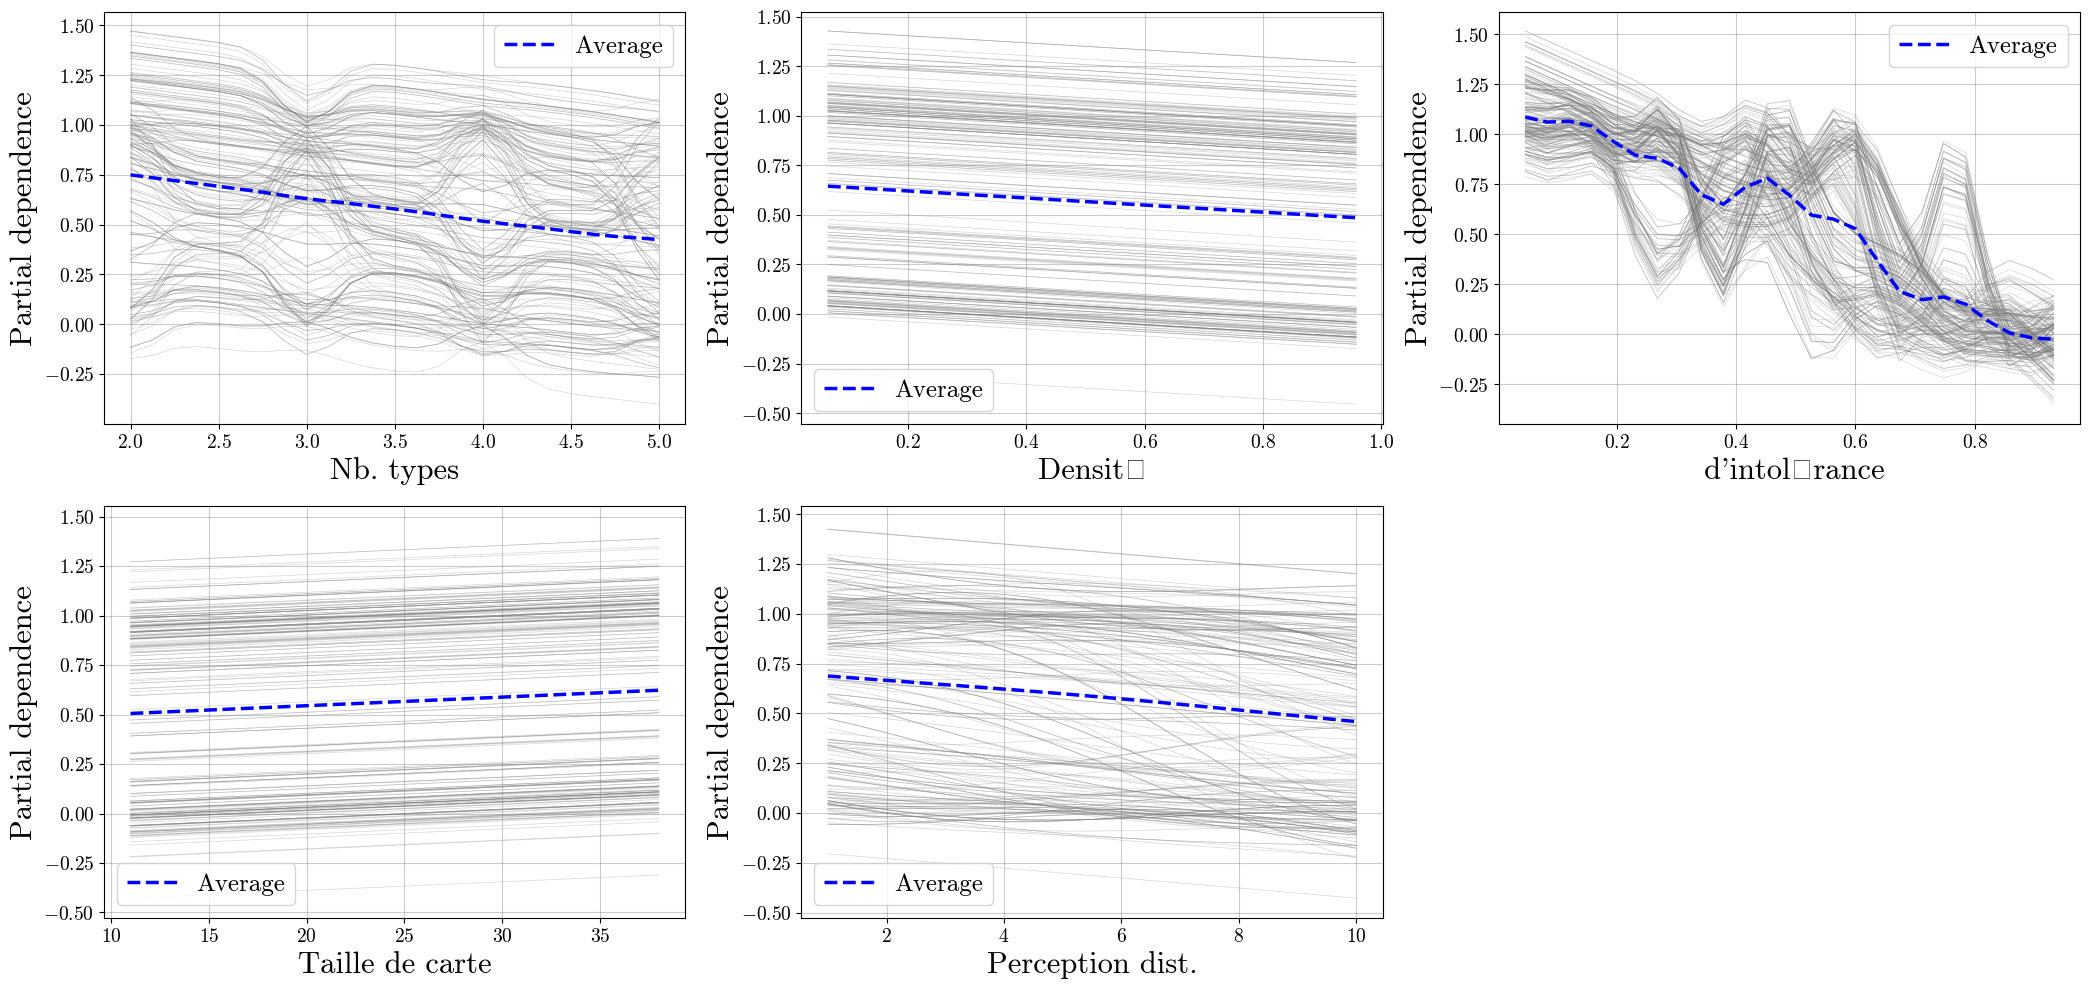

In [8]:
%matplotlib inline 

grid_resolution_1d = 25


pdd = PartialDependenceDisplay.from_surrogate_model(
    sm,
    DATABASEx,
    [0,1,2,3,4],
    feature_names=feature_names,
    grid_resolution=grid_resolution_1d,
    kind="both",
)

b = pdd.plot(centered=False)

b.show()
plt.savefig("conv_pdp_ice.png", dpi=350, bbox_inches='tight')
plt.tight_layout()
plt.show()


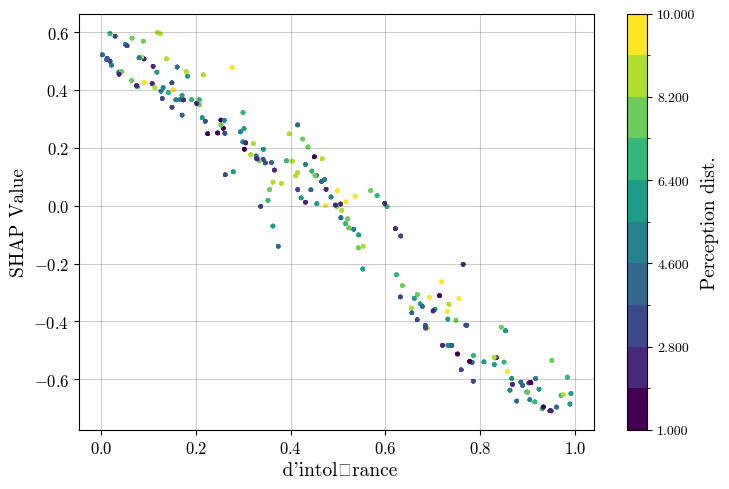

In [9]:

e = shap_explainer.interaction_plot([(2,4)])
e.show()
plt.show()